# 1. Data Preparation:

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df= pd.read_excel("heart_disease.xlsx", sheet_name='Heart_disease')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [32]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [33]:
df.dtypes


age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


# 2. Exploratory Data Analysis (EDA):

In [35]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
903    False
904    False
905    False
906    False
907    False
Length: 908, dtype: bool

In [36]:
df.duplicated().sum()

1

In [37]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

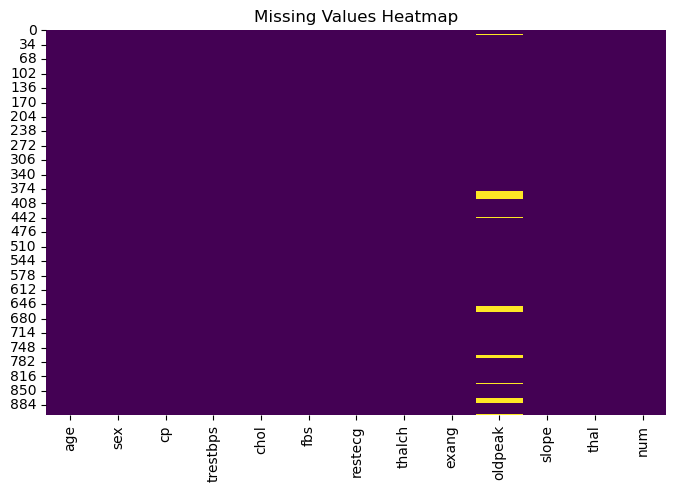

In [38]:
# Visualize missing values
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [39]:
for i in df.isna().sum():
    print(round(i/len(df)*100,2),'%')

0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
6.83 %
0.0 %
0.0 %
0.0 %


In [40]:
sns.boxplot(df['oldpeak'])

<Axes: ylabel='oldpeak'>

In [41]:
df["oldpeak"].fillna(df["oldpeak"].median(),inplace = True)

C:\Users\Hi\AppData\Local\Temp\ipykernel_27892\2977413415.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["oldpeak"].fillna(df["oldpeak"].median(),inplace = True)


In [42]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

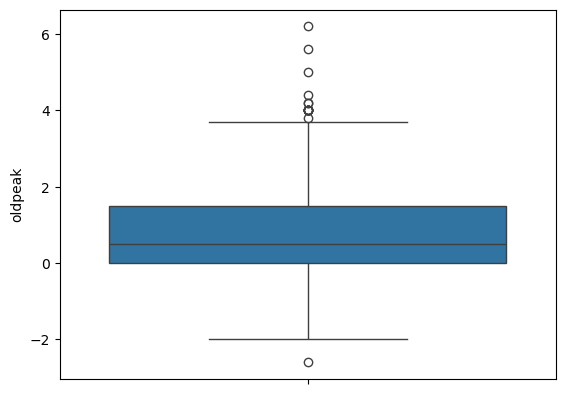

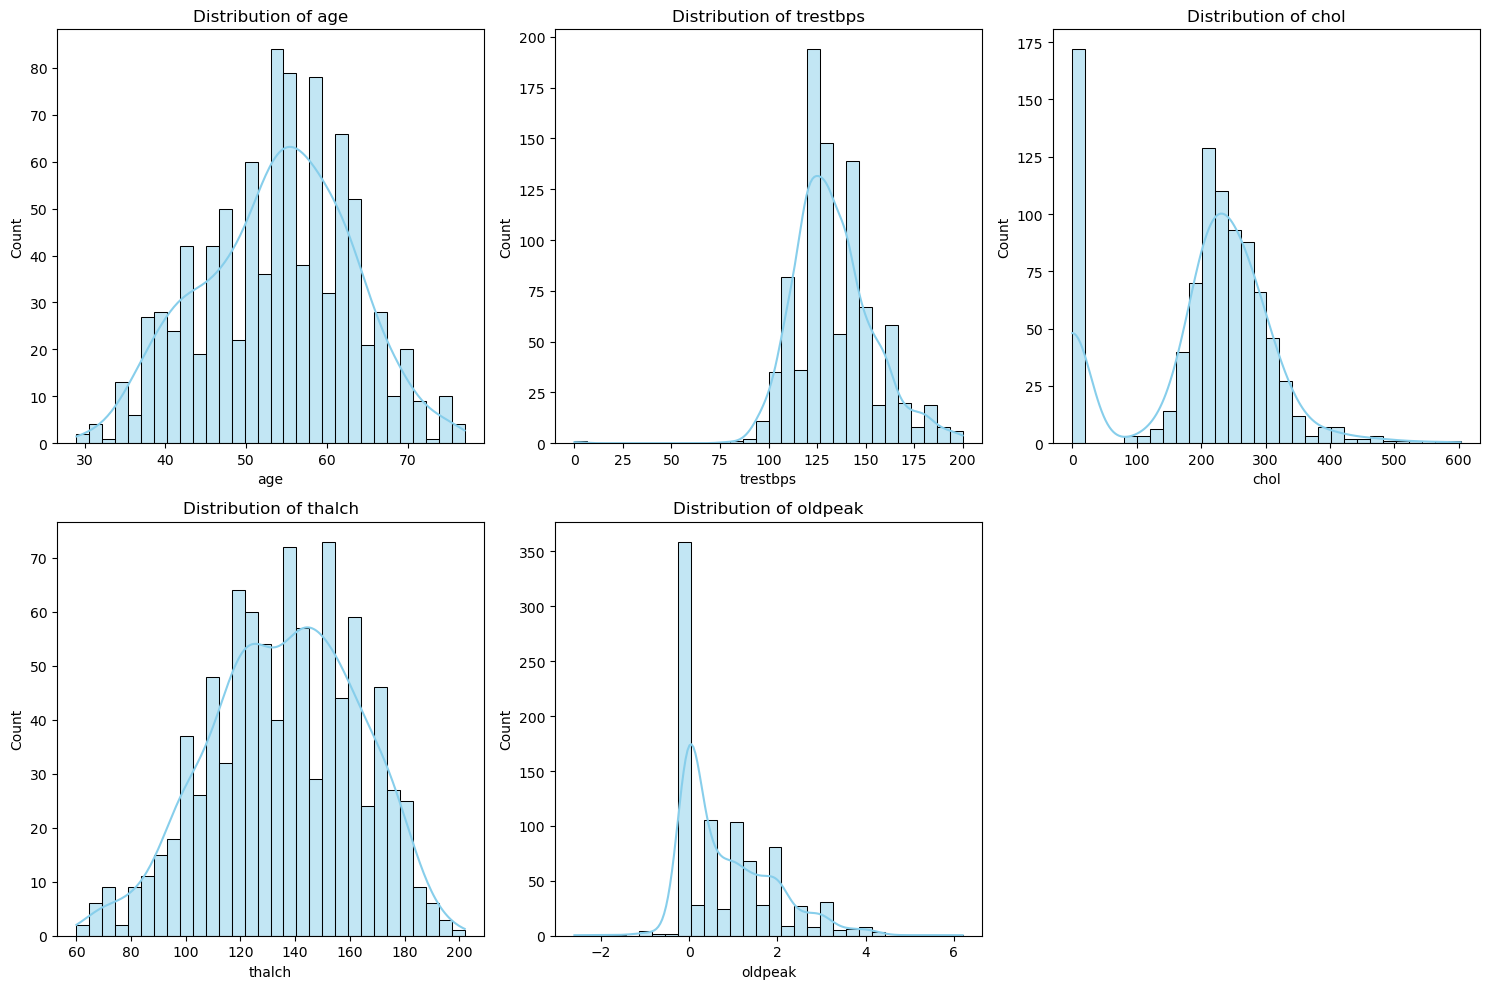

In [43]:
# Visualize distributions of numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

C:\Users\Hi\AppData\Local\Temp\ipykernel_27892\2582419783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=df, palette='viridis')


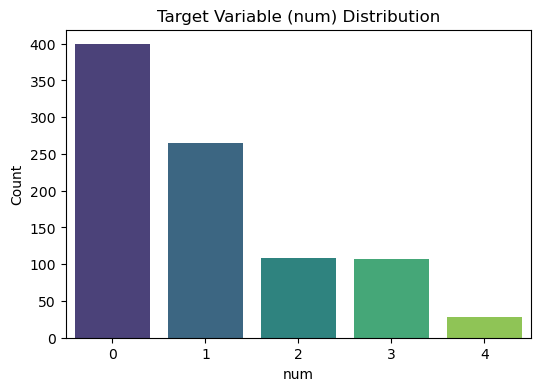

In [44]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=df, palette='viridis')
plt.title('Target Variable (num) Distribution')
plt.xlabel('num')
plt.ylabel('Count')
plt.show()

# 3. Feature Engineering

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
# Handle missing values (e.g., impute 'oldpeak' with mean)
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

C:\Users\Hi\AppData\Local\Temp\ipykernel_27892\805274445.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)


In [47]:
# Standardize and clean boolean-like columns
boolean_like_columns = ['exang', 'fbs']  # Add relevant boolean-like columns here
for col in boolean_like_columns:
    # Replace string booleans and typos with actual boolean values
    df[col] = df[col].replace({'TRUE': True, 'FALSE': False, 'TURE': True})
    # Convert booleans to integers (True → 1, False → 0)
    df[col] = df[col].astype(int)

C:\Users\Hi\AppData\Local\Temp\ipykernel_27892\3767615034.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'TRUE': True, 'FALSE': False, 'TURE': True})


In [48]:
# Ensure all categorical columns are strings
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Convert to strings for uniformity

In [49]:
# Apply Label Encoding to categorical columns
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Display the first few rows after encoding
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0     150      0      2.3      0   
1   41    1   1       135   203    0        1     132      0      0.0      1   
2   57    1   0       140   192    0        1     148      0      0.4      1   
3   52    1   3       118   186    0        0     190      0      0.0      1   
4   57    1   0       110   201    0        1     126      1      1.5      1   

   thal  num  
0     0    0  
1     0    0  
2     0    0  
3     0    0  
4     0    0  


In [50]:
# Display the first few rows after encoding
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0     150      0      2.3      0   
1   41    1   1       135   203    0        1     132      0      0.0      1   
2   57    1   0       140   192    0        1     148      0      0.4      1   
3   52    1   3       118   186    0        0     190      0      0.0      1   
4   57    1   0       110   201    0        1     126      1      1.5      1   

   thal  num  
0     0    0  
1     0    0  
2     0    0  
3     0    0  
4     0    0  


# 4. Decision Tree Classification

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
# Split dataset into features (X) and target (y)
X = df.drop('num', axis=1)
y = df['num']

In [53]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
# Predictions
y_pred = dt_model.predict(X_test)

In [56]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[64 16  5  3  1]
 [17 18  7  6  0]
 [ 3  4  9  5  1]
 [ 4  8  0  2  3]
 [ 0  5  1  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72        89
           1       0.35      0.38      0.36        48
           2       0.41      0.41      0.41        22
           3       0.12      0.12      0.12        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.32      0.32      0.32       182
weighted avg       0.51      0.51      0.51       182



# 5. Hyperparameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [59]:
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [60]:
# Best parameters and model performance
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [61]:
# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best))


Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        89
           1       0.38      0.48      0.43        48
           2       0.25      0.23      0.24        22
           3       0.25      0.06      0.10        17
           4       0.00      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.32      0.31      0.30       182
weighted avg       0.50      0.54      0.52       182



c:\Users\Hi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 6. Model Evaluation and Analysis

In [62]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [63]:
# Ensure class names are in array-like format
class_names = sorted(df['num'].unique())  # Convert to a sorted list

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Decision tree models have several important hyperparameters that control the growth of the tree and influence its performance. Some common ones include:

1. Max Depth (max_depth)
Description: The maximum depth of the tree. This defines the longest path from the root node to any leaf node.
Effect on Performance:
Shallow trees (small max depth) may underfit the data, as they can't capture complex patterns.
Deep trees (large max depth) may overfit the training data, capturing noise and leading to poor generalization on new data.
2. Minimum Samples per Leaf (min_samples_leaf)
Description: The minimum number of samples required to be at a leaf node. If a node contains fewer than this number of samples, the tree will stop growing further.
Effect on Performance:
Higher values of min_samples_leaf can reduce overfitting by making the tree more general.
Lower values allow the tree to grow deeper and capture more intricate patterns but might lead to overfitting.
3. Minimum Samples per Split (min_samples_split)
Description: The minimum number of samples required to split an internal node. If a node has fewer than this number of samples, it won't be split further.
Effect on Performance:
Higher values reduce the depth of the tree and prevent it from growing too complex, helping with overfitting.
Lower values allow the tree to grow more complex, which may improve accuracy on the training set but risk overfitting.
4. Maximum Features (max_features)
Description: The maximum number of features to consider when splitting a node. This parameter limits the number of features the tree can use at each split.
Effect on Performance:
Lower values reduce overfitting, as they prevent the model from relying too much on specific features.
Higher values allow the tree to use more information for splitting, which can improve performance but also increase the risk of overfitting.
5. Criterion (criterion)
Description: The function used to evaluate the quality of a split. Common options are:
"gini" (Gini impurity)
"entropy" (information gain)
Effect on Performance:
"gini" tends to produce similar results to "entropy" in most cases but is faster to compute.
"entropy" may be used for certain problems when maximizing information gain is a priority.
6. Splitter (splitter)
Description: The strategy used to split at each node. Common options are:
"best": Chooses the best split based on the criterion.
"random": Chooses the best random split from the available features.
Effect on Performance:
"best" tends to be more accurate but slower.
"random" can speed up the process but may result in a slightly less accurate tree.
7. Maximum Leaf Nodes (max_leaf_nodes)
Description: The maximum number of leaf nodes in the tree. This limits the size of the tree.
Effect on Performance:
Lower values can prevent overfitting by restricting the number of terminal nodes.
Higher values may increase accuracy by allowing more splits, but they can also increase the risk of overfitting.
8. Pruning Parameters (Post-Pruning)
Description: Pruning involves reducing the size of a tree after it has been fully grown to avoid overfitting.
"ccp_alpha" (Cost Complexity Pruning) is one such parameter that controls the complexity of the tree by penalizing splits that do not improve performance enough.
Effect on Performance: Pruning helps balance between bias and variance, reducing the risk of overfitting by simplifying the model.


# 2. What is the difference between the Label encoding and One-hot encoding?
Both label encoding and one-hot encoding are techniques used to convert categorical variables into numerical representations, but they differ in how they transform the data.

Label Encoding:
Description: Label encoding assigns each unique category in a categorical variable to an integer label. For example, if a categorical variable has three categories: ["Red", "Green", "Blue"], label encoding would assign values:
"Red" → 0
"Green" → 1
"Blue" → 2


Effect on Model:
Pros: Label encoding is efficient in terms of memory and computational cost, as it converts each category to a single integer.
Cons: Label encoding introduces an ordinal relationship between categories (i.e., it implies that "Blue" > "Green" > "Red"), which might not be meaningful for non-ordinal data, potentially leading to misleading results in algorithms that interpret the numbers as having a ranking (like decision trees or linear models).
One-Hot Encoding:
Description: One-hot encoding creates a new binary column for each category in the variable. For example, with the categories ["Red", "Green", "Blue"], one-hot encoding creates three new columns:
"Red" → [1, 0, 0]
"Green" → [0, 1, 0]
"Blue" → [0, 0, 1]


Effect on Model:
Pros: One-hot encoding avoids introducing any ordinal relationships, as each category is treated independently. It is often preferred when the categorical variable has no inherent order.
Cons: One-hot encoding can lead to high-dimensional data, especially when the categorical variable has many unique values. This can increase the computational cost and the risk of overfitting in some cases.
Key Differences:


Label Encoding:
Assigns a unique integer to each category.
Can introduce ordinal relationships, which may be inappropriate for some variables.
Efficient in terms of memory usage, especially for variables with many categories.

-Hot Encoding:
Creates binary columns for each category.
Does not assume any ordinal relationship between categories.
Can lead to high-dimensional data, which may increase computational cost.


When to Use Each:
Label Encoding: Suitable for ordinal variables, where the order of the categories has meaning (e.g., "Low", "Medium", "High").
One-Hot Encoding: Ideal for nominal (non-ordinal) variables, where there is no meaningful order (e.g., "Red", "Blue", "Green").